## Part 1 - Exploratory data analysis

### 1. Sourcing and Loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
pd.options.display.max_columns=10000 
%matplotlib inline

In [2]:
# read json file
df1 = pd.read_json('logins.json')
df1.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [3]:
df1.tail()

,login_time
93137,1970-04-13 18:50:19
93138,1970-04-13 18:43:56
93139,1970-04-13 18:54:02
93140,1970-04-13 18:57:38
93141,1970-04-13 18:54:23


In [4]:
# looking at the shape of the data
df1.shape

(93142, 1)

In [5]:
# checking data types of the column
df1.dtypes

login_time    datetime64[ns]
dtype: object

In [6]:
# checking any null values
df1.isnull().values.any()

False

### 2. Cleaning, transformaning and visualizing

In [7]:
# couting each login
df1['login_count'] = 1
df1.head()

,login_time,login_count
0,1970-01-01 20:13:18,1
1,1970-01-01 20:16:10,1
2,1970-01-01 20:16:37,1
3,1970-01-01 20:16:36,1
4,1970-01-01 20:26:21,1


In [8]:
# converting login_time column into index
df1.set_index('login_time', inplace=True)
df1.head()

,login_count
login_time,
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:37,1
1970-01-01 20:16:36,1
1970-01-01 20:26:21,1


In [9]:
# checking the tail of the dataset
df1.tail()

,login_count
login_time,
1970-04-13 18:50:19,1
1970-04-13 18:43:56,1
1970-04-13 18:54:02,1
1970-04-13 18:57:38,1
1970-04-13 18:54:23,1


In [10]:
# spliting data into 15 minutes time interval
df1 = df1.resample("15min").sum()
df1.head()

,login_count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [11]:
df1.shape

(9788, 1)

In [12]:
y = df1['login_count']
type(y)

pandas.core.series.Series

In [13]:
y.describe()

count    9788.000000
mean        9.515938
std         8.328818
min         0.000000
25%         3.000000
50%         7.000000
75%        13.000000
max        73.000000
Name: login_count, dtype: float64

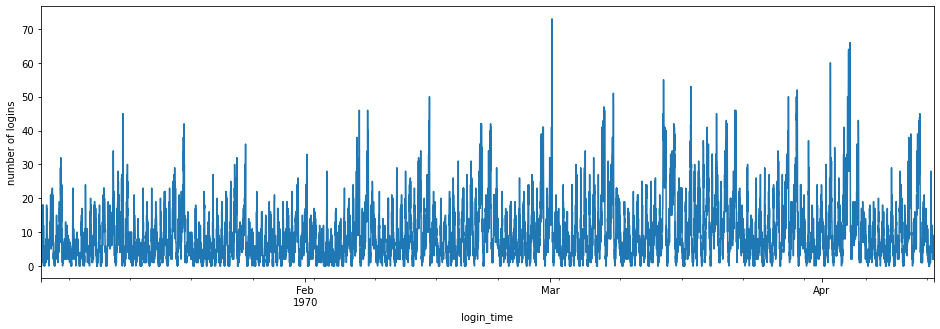

In [14]:
fig, ax = plt.subplots(figsize=(16,5))
plt.xlabel('time')
plt.ylabel('number of logins')
y.plot()
plt.show()

It looks like there is a pattern in the data, but it is hard to see. 

In [15]:
login_daily = df1.resample('D').sum()
friday = df1.resample('W-FRI').sum()
saturday = df1.resample('W-SAT').sum()
sunday = df1.resample('W-SUN').sum()

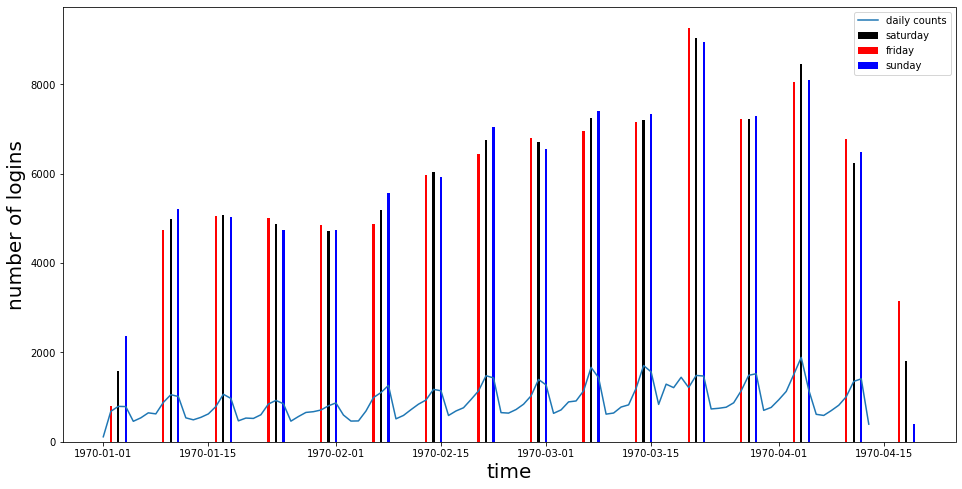

In [16]:
fig, ax = plt.subplots(figsize=(16,8))
plt.xlabel('time', fontsize=20)
plt.ylabel('number of logins', fontsize=20)
plt.plot(login_daily.index, login_daily.login_count, label='daily counts')
plt.bar(saturday.index, saturday.login_count ,width=0.3,label='saturday', color='Black')
plt.bar(friday.index, friday.login_count, width=0.3, label='friday', color = 'Red')
plt.bar(sunday.index, sunday.login_count, width=0.3, label='sunday', color='blue')
plt.legend(loc='upper right')
plt.show()

We can see that there is a pattern in the data when it is splited into days. Weekends have the highest count. And, Saturday has the largest count out of seven days. 

## Part 2 - Experiment and metrics design 

In [17]:
df2 = pd.read_json('ultimate_data_challenge.json')
df2.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [18]:
df2.shape

(50000, 12)

In [19]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [20]:
# missing data imputation
new_columns = ['avg_rating_of_driver_isnull', 'avg_rating_by_driver']

df2['avg_rating_by_driver_isnull'] = df2['avg_rating_by_driver'].isna()
df2['avg_rating_by_driver_isnull'] = df2['avg_rating_by_driver_isnull'].replace({False:0,True:1})
df2['avg_rating_by_driver'] = df2['avg_rating_by_driver'].fillna(value=0)

df2['avg_rating_of_driver_isnull'] = df2['avg_rating_of_driver'].isna()
df2['avg_rating_of_driver_isnull'] = df2['avg_rating_of_driver_isnull'].replace({False:0,True:1})
df2['avg_rating_of_driver'] = df2['avg_rating_of_driver'].fillna(value=0)

df2['phone'] = df2['phone'].fillna('unknown')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   city                         50000 non-null  object 
 1   trips_in_first_30_days       50000 non-null  int64  
 2   signup_date                  50000 non-null  object 
 3   avg_rating_of_driver         50000 non-null  float64
 4   avg_surge                    50000 non-null  float64
 5   last_trip_date               50000 non-null  object 
 6   phone                        50000 non-null  object 
 7   surge_pct                    50000 non-null  float64
 8   ultimate_black_user          50000 non-null  bool   
 9   weekday_pct                  50000 non-null  float64
 10  avg_dist                     50000 non-null  float64
 11  avg_rating_by_driver         50000 non-null  float64
 12  avg_rating_by_driver_isnull  50000 non-null  int64  
 13  avg_rating_of_dr

In [21]:
df2['signup_date'] = pd.to_datetime(df2['signup_date'])
df2['last_trip_date'] = pd.to_datetime(df2['last_trip_date'])

In [22]:
# finding the date the data is pulled
pulling_date = df2['last_trip_date'].max()

# finding 30 days before the pulling day
thirty_days_before = pulling_date - pd.Timedelta(days= 30)

# creating active status of dateframe inactive = 0, active = 1
df2['active_user'] = (df2['last_trip_date'] > thirty_days_before).astype('int')
df2.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,avg_rating_by_driver_isnull,avg_rating_of_driver_isnull,active_user
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,0,0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0,0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0,0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,0,0,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0,0,0


In [23]:
# calculating the fraction of the observed users.
active_users = df2[df2['active_user'] == 1]
inactive_users = df2[df2['active_user'] == 0]
# fraction of the observed users that were retained
fraction = round((len(active_users)/len(df2.active_user)) * 100, 2)
print('{} percent of users were retained.'.format(fraction))

36.62 percent of users were retained.


In [24]:
df2 = df2.drop(['signup_date', 'last_trip_date'],axis=1)
df2.head()

,city,trips_in_first_30_days,avg_rating_of_driver,avg_surge,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,avg_rating_by_driver_isnull,avg_rating_of_driver_isnull,active_user
0,King's Landing,4,4.7,1.10,iPhone,15.4,True,46.2,3.67,5.0,0,0,1
1,Astapor,0,5.0,1.00,Android,0.0,False,50.0,8.26,5.0,0,0,0
2,Astapor,3,4.3,1.00,iPhone,0.0,False,100.0,0.77,5.0,0,0,0
3,King's Landing,9,4.6,1.14,iPhone,20.0,True,80.0,2.36,4.9,0,0,1
4,Winterfell,14,4.4,1.19,Android,11.8,False,82.4,3.13,4.9,0,0,0


In [25]:
# Using get_dummies on categorical data
df2 = pd.get_dummies(df2, columns=['city', 'phone'])
df2.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,avg_rating_by_driver_isnull,avg_rating_of_driver_isnull,active_user,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,phone_unknown
0,4,4.7,1.10,15.4,True,46.2,3.67,5.0,0,0,1,0,1,0,0,1,0
1,0,5.0,1.00,0.0,False,50.0,8.26,5.0,0,0,0,1,0,0,1,0,0
2,3,4.3,1.00,0.0,False,100.0,0.77,5.0,0,0,0,1,0,0,0,1,0
3,9,4.6,1.14,20.0,True,80.0,2.36,4.9,0,0,1,0,1,0,0,1,0
4,14,4.4,1.19,11.8,False,82.4,3.13,4.9,0,0,0,0,0,1,1,0,0


In [26]:
y = df2['active_user']
X = df2.loc[:,df2.columns !='active_user']

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=123)
# We want to check the shape of the X_train, y_train, X_test and y_test to make sure the proportions are right.
print('X_train: ', X_train.shape)
print('y_train: ', y_train.shape)
print('X_test: ', X_test.shape)
print('y_test: ', y_test.shape)

X_train:  (37500, 16)
y_train:  (37500,)
X_test:  (12500, 16)
y_test:  (12500,)


In [28]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=10, random_state=2)
forest.fit(X_train,y_train)
y_pred = forest.predict(X_test)
y_train_pred = forest.predict(X_train)

In [30]:
# print the classification report
from sklearn import metrics
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.84      0.81      7879
           1       0.69      0.59      0.64      4621

    accuracy                           0.75     12500
   macro avg       0.73      0.72      0.72     12500
weighted avg       0.75      0.75      0.75     12500



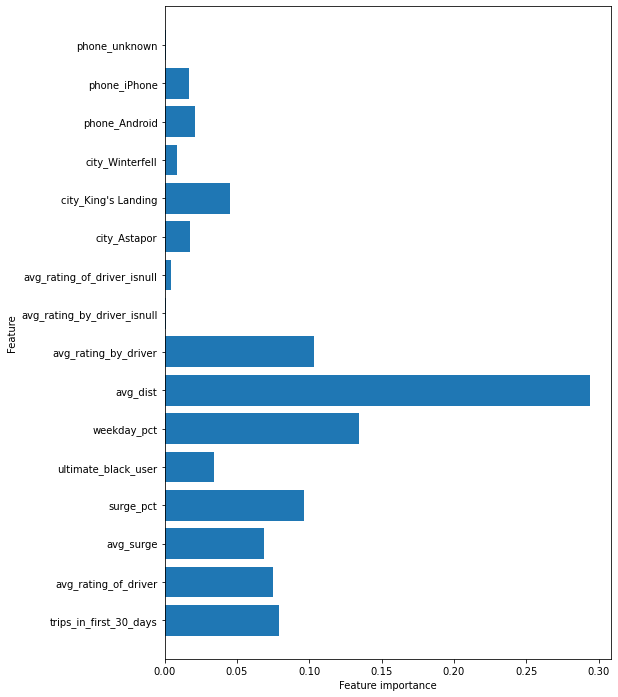

In [31]:
def plot_feature_importances_heart(model):
    n_features = X.shape[1]
    plt.figure(figsize=(8,12))
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X.columns)
    plt.xlabel("Feature importance")
    plt.ylabel('Feature')
    plt.ylim(-1, n_features)
plot_feature_importances_heart(forest)

#### Conclusion 

Random forest model gives us 75% accuracy. When we look at the graph above we can see that avg_dist has highest affect on rider retention. 